# Standardize Data

Exploring Feature Encoding and Standardization.

### Libraries

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3
from sklearn import preprocessing

%matplotlib inline

### Import Data

In [5]:
conn = sqlite3.connect('../data/crime_census_weather_tod.db')
df = pd.read_sql_query("select * from all_crimes", conn)
conn.close()

In [6]:
df.columns

Index(['level_0', 'BLOCK_GROUP', 'year', 'month', 'day', 'tod_cat', 'tod_num',
       'crime_counts', 'apparent_temp', 'cloud_cover', 'dew_point', 'humidity',
       'percip_intensity', 'percip_probability', 'pressure', 'temperature',
       'uv_index', 'visibility', 'wind_bearing', 'wind_gust', 'wind_speed',
       'weekday', 'index', 'TotalPop', 'TPopMargin', 'UnWgtSampleCtPop',
       'PerCapitaIncome', 'PerCapIncMargin', 'MedianHouseholdInc',
       'MedHouseholdIncMargin', 'MedianAge', 'MedianAgeMargin', 'HousingUnits',
       'HousingUnitsMargin', 'UnweightedSampleHousingUnits', 'State', 'County',
       'Tract', 'BlockGroup', 'census_year', 'crime_rate', 'crs',
       'crime_rate_cat'],
      dtype='object')

### Encode

Drop missing values.

In [17]:
df_m = df.dropna(how='any')

In [18]:
print(len(df),len(df_m), len(df)-len(df_m))

188224 179382 8842


Encode Blockgroup, which includes an embedded Tract.

In [19]:
le = preprocessing.LabelEncoder()

In [20]:
bg_fit = le.fit(df_m['BLOCK_GROUP'])

In [21]:
df_m['bg_cat'] = bg_fit.transform(df_m['BLOCK_GROUP'])

C:\Users\Barbieri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
print(df_m.columns, len(df_m.columns))

Index(['level_0', 'BLOCK_GROUP', 'year', 'month', 'day', 'tod_cat', 'tod_num',
       'crime_counts', 'apparent_temp', 'cloud_cover', 'dew_point', 'humidity',
       'percip_intensity', 'percip_probability', 'pressure', 'temperature',
       'uv_index', 'visibility', 'wind_bearing', 'wind_gust', 'wind_speed',
       'weekday', 'index', 'TotalPop', 'TPopMargin', 'UnWgtSampleCtPop',
       'PerCapitaIncome', 'PerCapIncMargin', 'MedianHouseholdInc',
       'MedHouseholdIncMargin', 'MedianAge', 'MedianAgeMargin', 'HousingUnits',
       'HousingUnitsMargin', 'UnweightedSampleHousingUnits', 'State', 'County',
       'Tract', 'BlockGroup', 'census_year', 'crime_rate', 'crs',
       'crime_rate_cat', 'bg_cat'],
      dtype='object') 44


### Standardize Features

Set Features and Target.

Dropped:
- crime_rate_cat: Our target. (1)
- crs, crime_rate, crime_counts: Versions of our target before categorization--not features. (3)
- level_0, index: Not features and can't possibly explain anything. (2)
- state, county: Do not change, they can't possibly explain anything. (2)
- census_year: Redundant as we have Year. (1)
- tod_cat: Character version of tod_num. (1)
- BLOCK_GROUP: We encoded it as bg_cat. (1)
- Tract, BlockGroup: Redundant, BLOCK_GROUP is a concatenation of both. (2)
- PerCapIncMargin, MedHouseholdIncMargin, MedianAgeMargin, HousingUnitsMargin, TPopMargin: Margins around Census Estimates--not features. (5)

In [25]:
feature_cols = [
    'year', 'month', 'day', 'tod_num',
    'apparent_temp', 'cloud_cover', 'dew_point', 'humidity',
    'percip_intensity', 'percip_probability', 'pressure', 'temperature',
    'uv_index', 'visibility', 'wind_bearing', 'wind_gust', 'wind_speed',
    'weekday', 'TotalPop', 'UnWgtSampleCtPop',
    'PerCapitaIncome', 'MedianHouseholdInc', 'MedianAge', 'HousingUnits',
    'UnweightedSampleHousingUnits', 'bg_cat'
]

target_cols = 'crime_rate_cat'

print(len(feature_cols), len(df_m.columns), len(df_m.columns)-len(feature_cols))

26 44 18


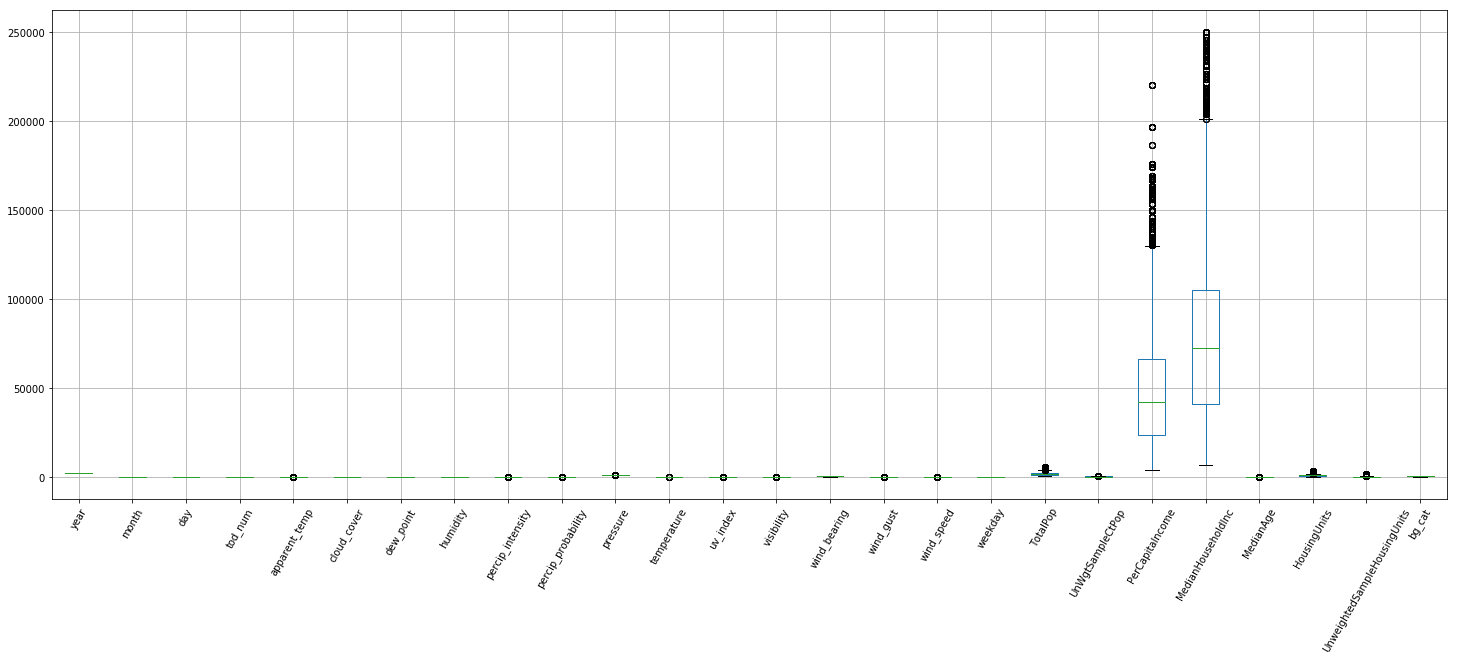

In [26]:
fig = plt.figure(figsize=(25,9))
ax1 = fig.add_subplot(1,1,1)

df_m[feature_cols].boxplot(ax=ax1, rot=60)

Standardize Features

In [27]:
scaler = preprocessing.StandardScaler()
robust = preprocessing.RobustScaler()
minmax = preprocessing.MinMaxScaler()

scaler_df = pd.DataFrame(scaler.fit_transform(df_m[feature_cols]), columns=feature_cols)
robust_df = pd.DataFrame(robust.fit_transform(df_m[feature_cols]), columns=feature_cols)
minmax_df = pd.DataFrame(minmax.fit_transform(df_m[feature_cols]), columns=feature_cols)

C:\Users\Barbieri\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Barbieri\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Barbieri\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


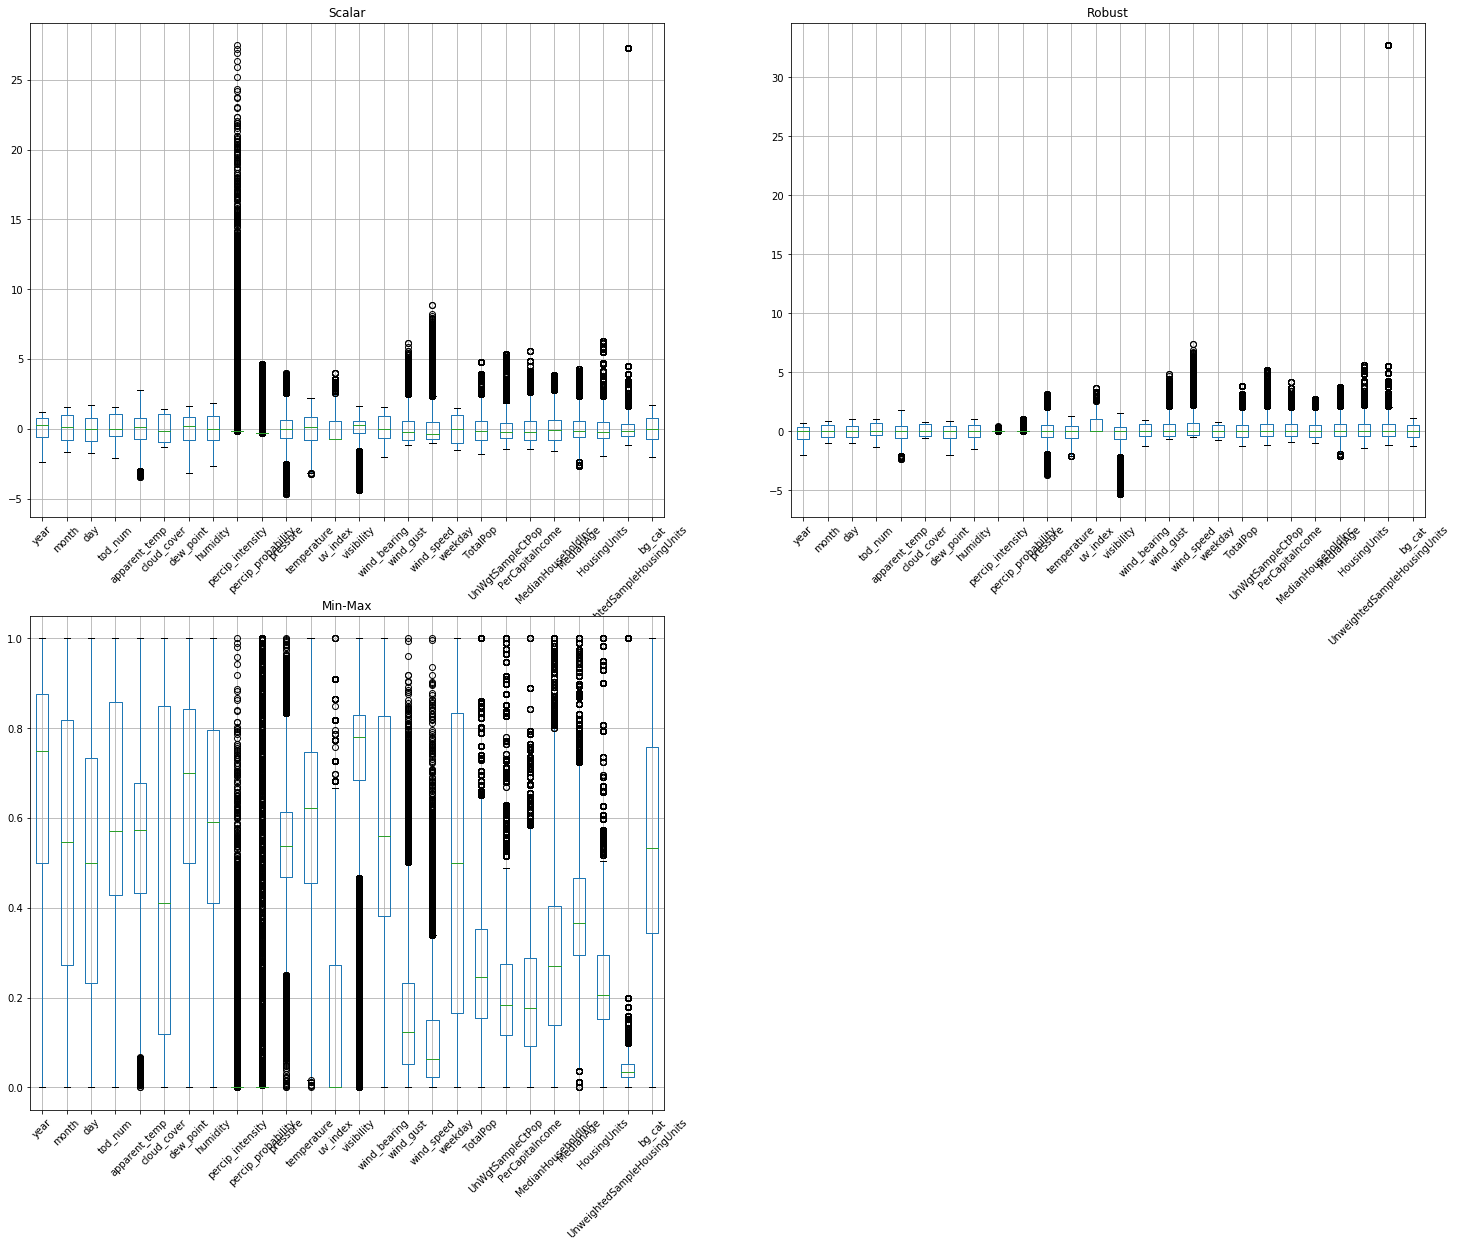

In [28]:
fig = plt.figure(figsize=(25,20))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

scaler_df.boxplot(ax=ax1)
robust_df.boxplot(ax=ax2)
minmax_df.boxplot(ax=ax3)

ax1_labels = ax1.get_xticklabels()
ax2_labels = ax2.get_xticklabels()
ax3_labels = ax3.get_xticklabels()

ax1.set_xticklabels(ax1_labels,rotation=45)
ax2.set_xticklabels(ax2_labels,rotation=45)
ax3.set_xticklabels(ax3_labels,rotation=45)

ax1.title.set_text('Scalar')
ax2.title.set_text('Robust')
ax3.title.set_text('Min-Max')

plt.show()